In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import datetime
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score, KFold
import optuna
import tensorflow as tf
from tensorflow.keras import layers, models, callbacks

In [2]:
df = pd.read_csv("train.csv")
df_test = pd.read_csv("testFeatures.csv")

In [3]:
import random
SEED = 42

random.seed(SEED)

np.random.seed(SEED)

tf.random.set_seed(SEED)

### EDA

In [5]:
df.shape

(227520, 8)

In [6]:
df_test.value_counts()

id     tarih       ürün        ürün besin değeri  ürün kategorisi              ürün üretim yeri  market  şehir
0      2024-01-01  kıyma       120                et                           Yurt içi          K       S        1
30307  2024-08-01  salam       125                süt ürünleri ve kahvaltılık  Yurt dışı         Y       H        1
30331  2024-08-01  fındık      110                kuruyemiş                    Yurt dışı         Y       H        1
30332  2024-08-01  fıstık      115                kuruyemiş                    Yurt dışı         Y       H        1
30333  2024-08-01  kaju        100                kuruyemiş                    Yurt dışı         Y       H        1
                                                                                                                 ..
15169  2024-05-01  tavuk       103                et                           Yurt içi          K       S        1
15170  2024-05-01  hindi       160                et                         

In [7]:
df.head()

,tarih,ürün,ürün besin değeri,ürün kategorisi,ürün fiyatı,ürün üretim yeri,market,şehir
0,2019-01-01,kıyma,120,et,32.70,Yurt içi,K,S
1,2019-01-01,tavuk,103,et,11.04,Yurt içi,K,S
2,2019-01-01,hindi,160,et,11.20,Yurt içi,K,S
3,2019-01-01,Bakla-kuru,354,sebze ve bakliyat,7.04,Yurt içi,K,S
4,2019-01-01,Bakla-taze,72,sebze ve bakliyat,13.28,Yurt içi,K,S


In [8]:
df.describe()

,ürün besin değeri,ürün fiyatı
count,227520.000000,227520.000000
mean,143.113924,17.018837
std,133.218871,14.470524
min,8.000000,0.740000
25%,41.000000,7.380000
50%,83.000000,12.860000
75%,250.000000,21.630000
max,402.000000,164.530000


In [9]:
df.isnull().sum()

tarih                0
ürün                 0
ürün besin değeri    0
ürün kategorisi      0
ürün fiyatı          0
ürün üretim yeri     0
market               0
şehir                0
dtype: int64

In [10]:
df.nunique()

tarih                  60
ürün                   79
ürün besin değeri      56
ürün kategorisi         6
ürün fiyatı          8554
ürün üretim yeri        2
market                  3
şehir                   8
dtype: int64

In [11]:
df["ürün"].unique()

array(['kıyma', 'tavuk', 'hindi', 'Bakla-kuru', 'Bakla-taze', 'Bamya',
       'Barbunya-kuru', 'Bezelye-taze', 'Biber-yeşil', 'Brüksel laha.',
       'Domates', 'Enginar', 'Fasulye-kuru', 'Fasulye-taze', 'Havuç',
       'Salatalık', 'Ispanak', 'Kabak', 'Karnabahar', 'Kereviz-baş',
       'Kırmızı-pancar', 'Lahana', 'Mantar', 'Marul', 'Mercimek-kuru',
       'Nohut', 'Pancar', 'Patates', 'Patlıcan', 'Pazı', 'Pırasa',
       'Semizotu', 'Buğday ekmeği', 'Bulgur', 'Erişte', 'Makarna',
       'Mısır', 'Mısır unu', 'Nişasta', 'Pilav', 'Pirinç unu', 'Şehriye',
       'Tarhana', 'Yulaf unu', 'yumurta', 'beyaz peynir', 'Kaşar peyniri',
       'krema', 'yoğurt', 'sucuk', 'salam', 'sosis', 'tam buğday ekmek',
       'kaymak', 'bal', 'tereyağ', 'Armut', 'Çilek', 'Elma',
       'Erik türleri', 'İncir', 'Karadut', 'Karpuz', 'Kavun', 'Kayısı',
       'Kiraz', 'Limon', 'Mandalina', 'Muz', 'Nar', 'Portakal', 'Şeftali',
       'Üzüm', 'Vişne', 'fındık', 'fıstık', 'kaju', 'badem', 'ceviz'],
      dtype=

In [12]:
df["ürün besin değeri"].unique()

array([120, 103, 160, 354,  72,  42, 346,  47,  25,  63, 333,  35,   8,
        19,  38,  24,  16,  15, 351, 376,  83,  27,  52,  32, 247, 350,
       390, 353, 368, 329, 402, 100, 150, 170, 200,  90, 125, 250, 400,
       375,  57,  39,  60,  80,  93,  28,  54,  79,  17,  36,  77,  41,
        49,  74, 110, 115], dtype=int64)

In [13]:
df["ürün kategorisi"].unique()

array(['et', 'sebze ve bakliyat', 'tahıl ve ürünleri',
       'süt ürünleri ve kahvaltılık', 'meyve', 'kuruyemiş'], dtype=object)

In [14]:
df["şehir"].unique()

array(['S', 'E', 'V', 'A', 'L', 'F', 'G', 'H'], dtype=object)

In [15]:
df["market"].unique()

array(['K', 'C', 'Y'], dtype=object)

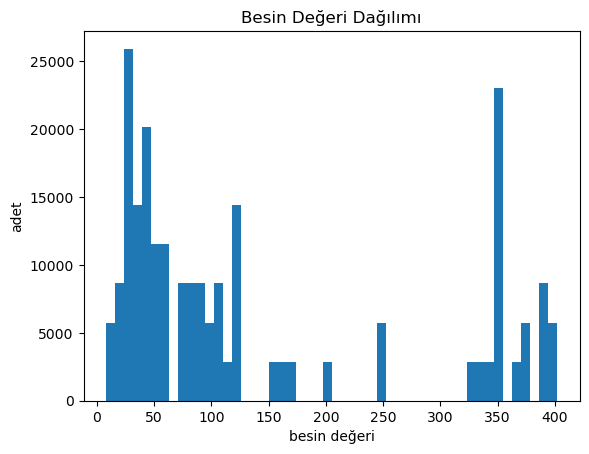

In [16]:
plt.figure()
plt.hist(df['ürün besin değeri'], bins=50)
plt.title("Besin Değeri Dağılımı")
plt.xlabel("besin değeri"); plt.ylabel("adet")
plt.show()

In [17]:
df['tarih']= pd.to_datetime(df['tarih'])

df['ay'] = df['tarih'].dt.month
df["sene"] = df["tarih"].dt.year

df = df.drop("tarih",axis=1)

In [18]:
df_test['tarih']= pd.to_datetime(df_test['tarih'])

df_test['ay'] = df_test['tarih'].dt.month
df_test["sene"] = df_test["tarih"].dt.year

df_test = df_test.drop("tarih",axis=1)

In [19]:
df_test.head()

,id,ürün,ürün besin değeri,ürün kategorisi,ürün üretim yeri,market,şehir,ay,sene
0,0,kıyma,120,et,Yurt içi,K,S,1,2024
1,1,tavuk,103,et,Yurt içi,K,S,1,2024
2,2,hindi,160,et,Yurt içi,K,S,1,2024
3,3,Bakla-kuru,354,sebze ve bakliyat,Yurt içi,K,S,1,2024
4,4,Bakla-taze,72,sebze ve bakliyat,Yurt içi,K,S,1,2024


In [20]:
df.head()

,ürün,ürün besin değeri,ürün kategorisi,ürün fiyatı,ürün üretim yeri,market,şehir,ay,sene
0,kıyma,120,et,32.70,Yurt içi,K,S,1,2019
1,tavuk,103,et,11.04,Yurt içi,K,S,1,2019
2,hindi,160,et,11.20,Yurt içi,K,S,1,2019
3,Bakla-kuru,354,sebze ve bakliyat,7.04,Yurt içi,K,S,1,2019
4,Bakla-taze,72,sebze ve bakliyat,13.28,Yurt içi,K,S,1,2019


In [21]:
df_test_deneme = df[df["sene"]== 2023]

In [22]:
#df = df[df["sene"]!= 2023]

### Encoding

#### "et" kategorisindeki ürünler için encoding

In [25]:
df_et = df[df["ürün kategorisi"] == "et"]
print(df_et["ürün"].unique()) 

['kıyma' 'tavuk' 'hindi']


In [26]:
df_test_et = df_test[df_test["ürün kategorisi"] == "et"]
print(df_test_et["ürün"].unique()) 

['kıyma' 'tavuk' 'hindi']


In [27]:
df_test_deneme_et = df_test_deneme[df_test_deneme["ürün kategorisi"] == "et"]
print(df_test_deneme_et["ürün"].unique()) 

['kıyma' 'tavuk' 'hindi']


In [28]:
df_test_deneme["ürün kategorisi"].unique()

array(['et', 'sebze ve bakliyat', 'tahıl ve ürünleri',
       'süt ürünleri ve kahvaltılık', 'meyve', 'kuruyemiş'], dtype=object)

In [29]:
etiket_map = {
    "kıyma": 2,
    "hindi": 1,
    "tavuk": 0
}

# Yeni bir sütun ekleyerek etiketi ata
df["ürün_encoded"] = df_et["ürün"].map(etiket_map)

In [30]:
df_test["ürün_encoded"] = df_test_et["ürün"].map(etiket_map)

df_test_deneme["ürün_encoded"] = df_test_deneme_et["ürün"].map(etiket_map)

C:\Users\Sadık\AppData\Local\Temp\ipykernel_10244\830392447.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test_deneme["ürün_encoded"] = df_test_deneme_et["ürün"].map(etiket_map)


In [31]:
df_test[df_test["ürün kategorisi"]=="et"].head()

,id,ürün,ürün besin değeri,ürün kategorisi,ürün üretim yeri,market,şehir,ay,sene,ürün_encoded
0,0,kıyma,120,et,Yurt içi,K,S,1,2024,2.0
1,1,tavuk,103,et,Yurt içi,K,S,1,2024,0.0
2,2,hindi,160,et,Yurt içi,K,S,1,2024,1.0
79,79,kıyma,120,et,Yurt dışı,K,S,1,2024,2.0
80,80,tavuk,103,et,Yurt dışı,K,S,1,2024,0.0


In [32]:
df[df["ürün kategorisi"]=="et"].head()

,ürün,ürün besin değeri,ürün kategorisi,ürün fiyatı,ürün üretim yeri,market,şehir,ay,sene,ürün_encoded
0,kıyma,120,et,32.70,Yurt içi,K,S,1,2019,2.0
1,tavuk,103,et,11.04,Yurt içi,K,S,1,2019,0.0
2,hindi,160,et,11.20,Yurt içi,K,S,1,2019,1.0
79,kıyma,120,et,32.98,Yurt dışı,K,S,1,2019,2.0
80,tavuk,103,et,11.04,Yurt dışı,K,S,1,2019,0.0


#### "sebze ve bakliyat" kategorisindeki ürünler için encoding

In [34]:
df_sebzebakliyat = df[df["ürün kategorisi"] == "sebze ve bakliyat"]
print(df_sebzebakliyat["ürün"].unique()) 

['Bakla-kuru' 'Bakla-taze' 'Bamya' 'Barbunya-kuru' 'Bezelye-taze'
 'Biber-yeşil' 'Brüksel laha.' 'Domates' 'Enginar' 'Fasulye-kuru'
 'Fasulye-taze' 'Havuç' 'Salatalık' 'Ispanak' 'Kabak' 'Karnabahar'
 'Kereviz-baş' 'Kırmızı-pancar' 'Lahana' 'Mantar' 'Marul' 'Mercimek-kuru'
 'Nohut' 'Pancar' 'Patates' 'Patlıcan' 'Pazı' 'Pırasa' 'Semizotu']


In [35]:
sebzeler = [
    "Bamya", "Bezelye-taze", "Biber-yeşil", "Brüksel laha.", "Domates", "Enginar",
    "Havuç", "Salatalık", "Ispanak", "Kabak", "Karnabahar", "Kereviz-baş",
    "Kırmızı-pancar", "Lahana", "Mantar", "Marul", "Pancar", "Patates",
    "Patlıcan", "Pazı", "Pırasa", "Semizotu"
]

bakliyatlar = [
    "Bakla-kuru", "Bakla-taze", "Barbunya-kuru", "Fasulye-kuru", "Fasulye-taze",
    "Mercimek-kuru", "Nohut"
]

In [36]:
def kategori_belirle(urun):
    if urun in sebzeler:
        return "sebze"
    elif urun in bakliyatlar:
        return "bakliyat"

df.loc[df["ürün kategorisi"] == "sebze ve bakliyat", "ürün kategorisi"] = df["ürün"].apply(kategori_belirle)

df_test.loc[df_test["ürün kategorisi"] == "sebze ve bakliyat", "ürün kategorisi"] = df_test["ürün"].apply(kategori_belirle)

df_test_deneme.loc[df_test_deneme["ürün kategorisi"] == "sebze ve bakliyat", "ürün kategorisi"] = df_test_deneme["ürün"].apply(kategori_belirle)

In [37]:
sebze_df = df[df["ürün kategorisi"] == "sebze"]
sebze_sirali = sebze_df.sort_values(by="ürün fiyatı", ascending=False)

In [38]:
sebze_urun_sirasi = sebze_sirali["ürün"].unique()
print(sebze_urun_sirasi)

['Brüksel laha.' 'Mantar' 'Ispanak' 'Bezelye-taze' 'Biber-yeşil' 'Enginar'
 'Patlıcan' 'Karnabahar' 'Kabak' 'Havuç' 'Lahana' 'Pancar' 'Marul'
 'Kereviz-baş' 'Kırmızı-pancar' 'Bamya' 'Domates' 'Salatalık' 'Patates'
 'Pırasa' 'Semizotu' 'Pazı']


In [39]:
sebze_label_map = {urun: i for i, urun in enumerate(reversed(sebze_urun_sirasi))}

In [40]:
df.loc[df["ürün kategorisi"] == "sebze", "ürün_encoded"] = df["ürün"].map(sebze_label_map)

df_test.loc[df_test["ürün kategorisi"] == "sebze", "ürün_encoded"] = df_test["ürün"].map(sebze_label_map)

df_test_deneme.loc[df_test_deneme["ürün kategorisi"] == "sebze", "ürün_encoded"] = df_test_deneme["ürün"].map(sebze_label_map)

In [41]:
df_test[df_test["ürün kategorisi"]=="sebze"].head()

,id,ürün,ürün besin değeri,ürün kategorisi,ürün üretim yeri,market,şehir,ay,sene,ürün_encoded
5,5,Bamya,42,sebze,Yurt içi,K,S,1,2024,6.0
7,7,Bezelye-taze,47,sebze,Yurt içi,K,S,1,2024,18.0
8,8,Biber-yeşil,25,sebze,Yurt içi,K,S,1,2024,17.0
9,9,Brüksel laha.,47,sebze,Yurt içi,K,S,1,2024,21.0
10,10,Domates,25,sebze,Yurt içi,K,S,1,2024,5.0


In [42]:
df[df["ürün kategorisi"]=="sebze"].head()

,ürün,ürün besin değeri,ürün kategorisi,ürün fiyatı,ürün üretim yeri,market,şehir,ay,sene,ürün_encoded
5,Bamya,42,sebze,5.05,Yurt içi,K,S,1,2019,6.0
7,Bezelye-taze,47,sebze,11.96,Yurt içi,K,S,1,2019,18.0
8,Biber-yeşil,25,sebze,12.10,Yurt içi,K,S,1,2019,17.0
9,Brüksel laha.,47,sebze,22.93,Yurt içi,K,S,1,2019,21.0
10,Domates,25,sebze,4.11,Yurt içi,K,S,1,2019,5.0


In [43]:
bakliyat_df = df[df["ürün kategorisi"] == "bakliyat"]
bakliyat_sirali = bakliyat_df.sort_values(by="ürün fiyatı", ascending=False)

In [44]:
bakliyat_urun_sirasi = bakliyat_sirali["ürün"].unique()
print(bakliyat_urun_sirasi)

['Bakla-taze' 'Fasulye-taze' 'Fasulye-kuru' 'Bakla-kuru' 'Barbunya-kuru'
 'Mercimek-kuru' 'Nohut']


In [45]:
bakliyat_label_map = {urun: i for i, urun in enumerate(reversed(bakliyat_urun_sirasi))}

In [46]:
df.loc[df["ürün kategorisi"] == "bakliyat", "ürün_encoded"] = df["ürün"].map(bakliyat_label_map)

df_test.loc[df_test["ürün kategorisi"] == "bakliyat", "ürün_encoded"] = df_test["ürün"].map(bakliyat_label_map)

df_test_deneme.loc[df_test_deneme["ürün kategorisi"] == "bakliyat", "ürün_encoded"] = df_test_deneme["ürün"].map(bakliyat_label_map)

In [47]:
df_test[df_test["ürün kategorisi"]=="bakliyat"].head()

,id,ürün,ürün besin değeri,ürün kategorisi,ürün üretim yeri,market,şehir,ay,sene,ürün_encoded
3,3,Bakla-kuru,354,bakliyat,Yurt içi,K,S,1,2024,3.0
4,4,Bakla-taze,72,bakliyat,Yurt içi,K,S,1,2024,6.0
6,6,Barbunya-kuru,346,bakliyat,Yurt içi,K,S,1,2024,2.0
12,12,Fasulye-kuru,333,bakliyat,Yurt içi,K,S,1,2024,4.0
13,13,Fasulye-taze,35,bakliyat,Yurt içi,K,S,1,2024,5.0


In [48]:
df[df["ürün kategorisi"]=="bakliyat"].head()

,ürün,ürün besin değeri,ürün kategorisi,ürün fiyatı,ürün üretim yeri,market,şehir,ay,sene,ürün_encoded
3,Bakla-kuru,354,bakliyat,7.04,Yurt içi,K,S,1,2019,3.0
4,Bakla-taze,72,bakliyat,13.28,Yurt içi,K,S,1,2019,6.0
6,Barbunya-kuru,346,bakliyat,6.09,Yurt içi,K,S,1,2019,2.0
12,Fasulye-kuru,333,bakliyat,9.16,Yurt içi,K,S,1,2019,4.0
13,Fasulye-taze,35,bakliyat,9.00,Yurt içi,K,S,1,2019,5.0


#### "tahıl ve ürünleri" kategorisindeki ürünler için encoding

In [50]:
tahil_df = df[df["ürün kategorisi"] == "tahıl ve ürünleri"]
tahil_sirali = tahil_df.sort_values(by="ürün fiyatı", ascending=False)

In [51]:
tahil_urun_sirasi = tahil_sirali["ürün"].unique()
print(tahil_urun_sirasi)

['Yulaf unu' 'Mısır unu' 'Pirinç unu' 'Şehriye' 'Nişasta' 'Pilav'
 'Tarhana' 'Erişte' 'Mısır' 'Makarna' 'Bulgur' 'Buğday ekmeği']


In [52]:
tahil_label_map = {urun: i for i, urun in enumerate(reversed(tahil_urun_sirasi))}

In [53]:
df.loc[df["ürün kategorisi"] == "tahıl ve ürünleri", "ürün_encoded"] = df["ürün"].map(tahil_label_map)

df_test.loc[df_test["ürün kategorisi"] == "tahıl ve ürünleri", "ürün_encoded"] = df_test["ürün"].map(tahil_label_map)

df_test_deneme.loc[df_test_deneme["ürün kategorisi"] == "tahıl ve ürünleri", "ürün_encoded"] = df_test_deneme["ürün"].map(tahil_label_map)

In [54]:
df_test[df_test["ürün kategorisi"]=="tahıl ve ürünleri"].head()

,id,ürün,ürün besin değeri,ürün kategorisi,ürün üretim yeri,market,şehir,ay,sene,ürün_encoded
32,32,Buğday ekmeği,247,tahıl ve ürünleri,Yurt içi,K,S,1,2024,0.0
33,33,Bulgur,350,tahıl ve ürünleri,Yurt içi,K,S,1,2024,1.0
34,34,Erişte,390,tahıl ve ürünleri,Yurt içi,K,S,1,2024,4.0
35,35,Makarna,390,tahıl ve ürünleri,Yurt içi,K,S,1,2024,2.0
36,36,Mısır,351,tahıl ve ürünleri,Yurt içi,K,S,1,2024,3.0


In [55]:
df[df["ürün kategorisi"]=="tahıl ve ürünleri"].head()

,ürün,ürün besin değeri,ürün kategorisi,ürün fiyatı,ürün üretim yeri,market,şehir,ay,sene,ürün_encoded
32,Buğday ekmeği,247,tahıl ve ürünleri,0.75,Yurt içi,K,S,1,2019,0.0
33,Bulgur,350,tahıl ve ürünleri,1.50,Yurt içi,K,S,1,2019,1.0
34,Erişte,390,tahıl ve ürünleri,3.47,Yurt içi,K,S,1,2019,4.0
35,Makarna,390,tahıl ve ürünleri,1.50,Yurt içi,K,S,1,2019,2.0
36,Mısır,351,tahıl ve ürünleri,2.04,Yurt içi,K,S,1,2019,3.0


#### "süt ürünleri ve kahvaltılık" kategorisindeki ürünler için encoding

In [57]:
sut_df = df[df["ürün kategorisi"] == "süt ürünleri ve kahvaltılık"]
sut_sirali = sut_df.sort_values(by="ürün fiyatı", ascending=False)

In [58]:
sut_urun_sirasi = sut_sirali["ürün"].unique()
print(sut_urun_sirasi)

['bal' 'tereyağ' 'kaymak' 'Kaşar peyniri' 'beyaz peynir' 'sucuk' 'sosis'
 'salam' 'yoğurt' 'krema' 'yumurta' 'tam buğday ekmek']


In [59]:
sut_label_map = {urun: i for i, urun in enumerate(reversed(sut_urun_sirasi))}

In [60]:
df.loc[df["ürün kategorisi"] == "süt ürünleri ve kahvaltılık", "ürün_encoded"] = df["ürün"].map(sut_label_map)

df_test.loc[df_test["ürün kategorisi"] == "süt ürünleri ve kahvaltılık", "ürün_encoded"] = df_test["ürün"].map(sut_label_map)

df_test_deneme.loc[df_test_deneme["ürün kategorisi"] == "süt ürünleri ve kahvaltılık", "ürün_encoded"] = df_test_deneme["ürün"].map(sut_label_map)

In [61]:
df_test[df_test["ürün kategorisi"]=="süt ürünleri ve kahvaltılık"].head()

,id,ürün,ürün besin değeri,ürün kategorisi,ürün üretim yeri,market,şehir,ay,sene,ürün_encoded
44,44,yumurta,100,süt ürünleri ve kahvaltılık,Yurt içi,K,S,1,2024,1.0
45,45,beyaz peynir,150,süt ürünleri ve kahvaltılık,Yurt içi,K,S,1,2024,7.0
46,46,Kaşar peyniri,170,süt ürünleri ve kahvaltılık,Yurt içi,K,S,1,2024,8.0
47,47,krema,200,süt ürünleri ve kahvaltılık,Yurt içi,K,S,1,2024,2.0
48,48,yoğurt,90,süt ürünleri ve kahvaltılık,Yurt içi,K,S,1,2024,3.0


In [62]:
df[df["ürün kategorisi"]=="süt ürünleri ve kahvaltılık"].head()

,ürün,ürün besin değeri,ürün kategorisi,ürün fiyatı,ürün üretim yeri,market,şehir,ay,sene,ürün_encoded
44,yumurta,100,süt ürünleri ve kahvaltılık,7.58,Yurt içi,K,S,1,2019,1.0
45,beyaz peynir,150,süt ürünleri ve kahvaltılık,15.10,Yurt içi,K,S,1,2019,7.0
46,Kaşar peyniri,170,süt ürünleri ve kahvaltılık,16.24,Yurt içi,K,S,1,2019,8.0
47,krema,200,süt ürünleri ve kahvaltılık,8.02,Yurt içi,K,S,1,2019,2.0
48,yoğurt,90,süt ürünleri ve kahvaltılık,11.96,Yurt içi,K,S,1,2019,3.0


#### "meyve" kategorisindeki ürünler için encoding

In [64]:
meyve_df = df[df["ürün kategorisi"] == "meyve"]
meyve_sirali = meyve_df.sort_values(by="ürün fiyatı", ascending=False)

In [65]:
meyve_urun_sirasi = meyve_sirali["ürün"].unique()
print(meyve_urun_sirasi)

['Muz' 'Nar' 'Erik türleri' 'Kavun' 'Karpuz' 'Elma' 'Karadut' 'Kiraz'
 'Üzüm' 'Şeftali' 'Çilek' 'İncir' 'Vişne' 'Portakal' 'Armut' 'Kayısı'
 'Limon' 'Mandalina']


In [66]:
meyve_label_map = {urun: i for i, urun in enumerate(reversed(meyve_urun_sirasi))}

In [67]:
df.loc[df["ürün kategorisi"] == "meyve", "ürün_encoded"] = df["ürün"].map(meyve_label_map)

df_test.loc[df_test["ürün kategorisi"] == "meyve", "ürün_encoded"] = df_test["ürün"].map(meyve_label_map)

df_test_deneme.loc[df_test_deneme["ürün kategorisi"] == "meyve", "ürün_encoded"] = df_test_deneme["ürün"].map(meyve_label_map)

In [68]:
df_test[df_test["ürün kategorisi"]=="meyve"].head()

,id,ürün,ürün besin değeri,ürün kategorisi,ürün üretim yeri,market,şehir,ay,sene,ürün_encoded
56,56,Armut,57,meyve,Yurt içi,K,S,1,2024,3.0
57,57,Çilek,39,meyve,Yurt içi,K,S,1,2024,7.0
58,58,Elma,52,meyve,Yurt içi,K,S,1,2024,12.0
59,59,Erik türleri,60,meyve,Yurt içi,K,S,1,2024,15.0
60,60,İncir,80,meyve,Yurt içi,K,S,1,2024,6.0


In [69]:
df[df["ürün kategorisi"]=="meyve"].head()

,ürün,ürün besin değeri,ürün kategorisi,ürün fiyatı,ürün üretim yeri,market,şehir,ay,sene,ürün_encoded
56,Armut,57,meyve,4.05,Yurt içi,K,S,1,2019,3.0
57,Çilek,39,meyve,5.07,Yurt içi,K,S,1,2019,7.0
58,Elma,52,meyve,6.06,Yurt içi,K,S,1,2019,12.0
59,Erik türleri,60,meyve,7.02,Yurt içi,K,S,1,2019,15.0
60,İncir,80,meyve,4.02,Yurt içi,K,S,1,2019,6.0


#### "kuruyemiş" kategorisindeki ürünler için encoding

In [71]:
kuruyemis_df = df[df["ürün kategorisi"] == "kuruyemiş"]
kuruyemis_sirali = kuruyemis_df.sort_values(by="ürün fiyatı", ascending=False)

In [72]:
kuruyemis_urun_sirasi = kuruyemis_sirali["ürün"].unique()
print(kuruyemis_urun_sirasi)

['ceviz' 'kaju' 'fıstık' 'badem' 'fındık']


In [73]:
kuruyemis_label_map = {urun: i for i, urun in enumerate(reversed(kuruyemis_urun_sirasi))}

In [74]:
df.loc[df["ürün kategorisi"] == "kuruyemiş", "ürün_encoded"] = df["ürün"].map(kuruyemis_label_map)

df_test.loc[df_test["ürün kategorisi"] == "kuruyemiş", "ürün_encoded"] = df_test["ürün"].map(kuruyemis_label_map)

df_test_deneme.loc[df_test_deneme["ürün kategorisi"] == "kuruyemiş", "ürün_encoded"] = df_test_deneme["ürün"].map(kuruyemis_label_map)

In [75]:
df_test[df_test["ürün kategorisi"]=="kuruyemiş"].head()

,id,ürün,ürün besin değeri,ürün kategorisi,ürün üretim yeri,market,şehir,ay,sene,ürün_encoded
74,74,fındık,110,kuruyemiş,Yurt içi,K,S,1,2024,0.0
75,75,fıstık,115,kuruyemiş,Yurt içi,K,S,1,2024,2.0
76,76,kaju,100,kuruyemiş,Yurt içi,K,S,1,2024,3.0
77,77,badem,110,kuruyemiş,Yurt içi,K,S,1,2024,1.0
78,78,ceviz,120,kuruyemiş,Yurt içi,K,S,1,2024,4.0


In [76]:
df[df["ürün kategorisi"]=="kuruyemiş"].head()

,ürün,ürün besin değeri,ürün kategorisi,ürün fiyatı,ürün üretim yeri,market,şehir,ay,sene,ürün_encoded
74,fındık,110,kuruyemiş,14.10,Yurt içi,K,S,1,2019,0.0
75,fıstık,115,kuruyemiş,15.20,Yurt içi,K,S,1,2019,2.0
76,kaju,100,kuruyemiş,16.23,Yurt içi,K,S,1,2019,3.0
77,badem,110,kuruyemiş,15.10,Yurt içi,K,S,1,2019,1.0
78,ceviz,120,kuruyemiş,18.15,Yurt içi,K,S,1,2019,4.0


### Feature Engineering

#### Enflasyon

In [79]:
# Bu veriler "https://data.tuik.gov.tr"den alınmıştır.
cpi_data = {
    2019: [398.07, 398.71, 402.81, 409.63, 413.52, 413.63, 419.24, 422.84, 427.04, 435.59, 437.25, 440.50],
    2020: [446.45, 448.02, 450.58, 454.43, 460.62, 465.84, 468.56, 472.61, 477.21, 487.38, 498.58, 504.81],
    2021: [513.30, 517.96, 523.53, 532.32, 537.05, 547.48, 557.36, 563.60, 570.66, 584.32, 604.84, 686.95],
    2022: [763.23, 799.93, 843.64, 904.79, 931.76, 977.90,1001.03,1015.65,1046.89,1084.00,1115.26,1128.45],
    2023: [1203.48,1241.33,1269.75,1300.04,1300.60,1351.59,1479.84,1614.31,1691.04,1749.11,1806.50,1859.38],
    2024: [1984.02, 2073.88,2139.47, 2207.50, 2281.85, 2319.29, 2394.10, 2453.34, 2526.16, 2598.91, 2657.23, 2684.55]
}

infl_data = {
    2019: [20.35, 19.67, 19.71, 19.50, 18.71, 15.72, 16.65, 15.01,  9.26,  8.55, 10.56, 11.84],
    2020: [12.15, 12.37, 11.86, 10.94, 11.39, 12.62, 11.76, 11.77, 11.75, 11.89, 14.03, 14.60],
    2021: [14.97, 15.61, 16.19, 17.14, 16.59, 17.53, 18.95, 19.25, 19.58, 19.89, 21.31, 36.08],
    2022: [48.69, 54.44, 61.14, 69.97, 73.50, 78.62, 79.60, 80.21, 83.45, 85.51, 84.39, 64.27],
    2023: [57.68, 55.18, 50.51, 43.68, 39.59, 38.21, 47.83, 58.94, 61.53, 61.36, 61.98, 64.77],
    2024: [64.86, 67.07, 68.50, 69.80, 75.45, 71.60, 61.78, 51.97, 49.38, 48.58, 47.09 ,44.38]
}

In [80]:
cpi_rows, infl_rows = [], []
for year, cpi_vals in cpi_data.items():
    for month, val in enumerate(cpi_vals, start=1):
        cpi_rows.append({'sene': year, 'ay': month, 'CPI_level': val})
for year, infl_vals in infl_data.items():
    for month, val in enumerate(infl_vals, start=1):
        infl_rows.append({'sene': year, 'ay': month, 'CPI_annual_pct': val})

cpi_df  = pd.DataFrame(cpi_rows)
infl_df = pd.DataFrame(infl_rows)

In [81]:
df = (df.merge(cpi_df,  on=['sene','ay'], how='left').merge(infl_df, on=['sene','ay'], how='left'))

df_test = (df_test.merge(cpi_df,  on=['sene','ay'], how='left').merge(infl_df, on=['sene','ay'], how='left'))

df_test_deneme = (df_test_deneme.merge(cpi_df,  on=['sene','ay'], how='left').merge(infl_df, on=['sene','ay'], how='left'))

In [82]:
df.head()

,ürün,ürün besin değeri,ürün kategorisi,ürün fiyatı,ürün üretim yeri,market,şehir,ay,sene,ürün_encoded,CPI_level,CPI_annual_pct
0,kıyma,120,et,32.70,Yurt içi,K,S,1,2019,2.0,398.07,20.35
1,tavuk,103,et,11.04,Yurt içi,K,S,1,2019,0.0,398.07,20.35
2,hindi,160,et,11.20,Yurt içi,K,S,1,2019,1.0,398.07,20.35
3,Bakla-kuru,354,bakliyat,7.04,Yurt içi,K,S,1,2019,3.0,398.07,20.35
4,Bakla-taze,72,bakliyat,13.28,Yurt içi,K,S,1,2019,6.0,398.07,20.35


In [83]:
df_test.head()

,id,ürün,ürün besin değeri,ürün kategorisi,ürün üretim yeri,market,şehir,ay,sene,ürün_encoded,CPI_level,CPI_annual_pct
0,0,kıyma,120,et,Yurt içi,K,S,1,2024,2.0,1984.02,64.86
1,1,tavuk,103,et,Yurt içi,K,S,1,2024,0.0,1984.02,64.86
2,2,hindi,160,et,Yurt içi,K,S,1,2024,1.0,1984.02,64.86
3,3,Bakla-kuru,354,bakliyat,Yurt içi,K,S,1,2024,3.0,1984.02,64.86
4,4,Bakla-taze,72,bakliyat,Yurt içi,K,S,1,2024,6.0,1984.02,64.86


#### USD/TRY

In [85]:
usd_df= pd.read_excel("EVDS.xlsx") # Bu veriler "https://evds2.tcmb.gov.tr" den alınmıştır.

In [86]:
#usd_df_train= usd_df.iloc[:48, :2]

In [87]:
usd_df_train = usd_df.iloc[:60, :2]
usd_df_test_deneme = usd_df.iloc[48:60, :2]
usd_df_test = usd_df.iloc[60:72, :2]

In [88]:
usd_df_train['Tarih'] = pd.to_datetime(usd_df_train['Tarih'], format='%Y-%m')
usd_df_train['sene'] = usd_df_train['Tarih'].dt.year
usd_df_train['ay']   = usd_df_train['Tarih'].dt.month

usd_df_train= usd_df_train.drop("Tarih", axis=1)

In [89]:
usd_df_test['Tarih'] = pd.to_datetime(usd_df_test['Tarih'], format='%Y-%m')
usd_df_test['sene'] = usd_df_test['Tarih'].dt.year
usd_df_test['ay']   = usd_df_test['Tarih'].dt.month

usd_df_test= usd_df_test.drop("Tarih", axis=1)

In [90]:
usd_df_test_deneme['Tarih'] = pd.to_datetime(usd_df_test_deneme['Tarih'], format='%Y-%m')
usd_df_test_deneme['sene'] = usd_df_test_deneme['Tarih'].dt.year
usd_df_test_deneme['ay']   = usd_df_test_deneme['Tarih'].dt.month

usd_df_test_deneme= usd_df_test_deneme.drop("Tarih", axis=1)

In [91]:
usd_df_train.rename(columns={'TP DK USD S YTL': 'USD'}, inplace=True)
usd_df_test.rename(columns={'TP DK USD S YTL': 'USD'}, inplace=True)
usd_df_test_deneme.rename(columns={'TP DK USD S YTL': 'USD'}, inplace=True)

In [92]:
df = df.merge(
    usd_df_train[['sene','ay','USD']],
    on=['sene','ay'],
    how='left'
)

df_test = df_test.merge(
    usd_df_test[['sene','ay','USD']],
    on=['sene','ay'],
    how='left'
)

df_test_deneme = df_test_deneme.merge(
    usd_df_test_deneme[['sene','ay','USD']],
    on=['sene','ay'],
    how='left'
)

In [93]:
df_test.head()

,id,ürün,ürün besin değeri,ürün kategorisi,ürün üretim yeri,market,şehir,ay,sene,ürün_encoded,CPI_level,CPI_annual_pct,USD
0,0,kıyma,120,et,Yurt içi,K,S,1,2024,2.0,1984.02,64.86,30.05375
1,1,tavuk,103,et,Yurt içi,K,S,1,2024,0.0,1984.02,64.86,30.05375
2,2,hindi,160,et,Yurt içi,K,S,1,2024,1.0,1984.02,64.86,30.05375
3,3,Bakla-kuru,354,bakliyat,Yurt içi,K,S,1,2024,3.0,1984.02,64.86,30.05375
4,4,Bakla-taze,72,bakliyat,Yurt içi,K,S,1,2024,6.0,1984.02,64.86,30.05375


#### EURO/TRY

In [95]:
euro_df= pd.read_excel("EVDS_euro.xlsx") # Bu veriler "https://evds2.tcmb.gov.tr" den alınmıştır.

In [96]:
#euro_df_train = euro_df.iloc[:48, :2]

In [97]:
euro_df_train = euro_df.iloc[:60, :2]
euro_df_test_deneme = euro_df.iloc[48:60, :2]
euro_df_test = euro_df.iloc[60:72, :2]

In [98]:
euro_df_train['Tarih'] = pd.to_datetime(euro_df_train['Tarih'], format='%Y-%m')
euro_df_train['sene'] = euro_df_train['Tarih'].dt.year
euro_df_train['ay']   = euro_df_train['Tarih'].dt.month

euro_df_train= euro_df_train.drop("Tarih", axis=1)

In [99]:
euro_df_test['Tarih'] = pd.to_datetime(euro_df_test['Tarih'], format='%Y-%m')
euro_df_test['sene'] = euro_df_test['Tarih'].dt.year
euro_df_test['ay']   = euro_df_test['Tarih'].dt.month

euro_df_test= euro_df_test.drop("Tarih", axis=1)

In [100]:
euro_df_test_deneme['Tarih'] = pd.to_datetime(euro_df_test_deneme['Tarih'], format='%Y-%m')
euro_df_test_deneme['sene'] = euro_df_test_deneme['Tarih'].dt.year
euro_df_test_deneme['ay']   = euro_df_test_deneme['Tarih'].dt.month

euro_df_test_deneme= euro_df_test_deneme.drop("Tarih", axis=1)

In [101]:
euro_df_train.rename(columns={'TP DK EUR S YTL': 'EUR'}, inplace=True)
euro_df_test.rename(columns={'TP DK EUR S YTL': 'EUR'}, inplace=True)
euro_df_test_deneme.rename(columns={'TP DK EUR S YTL': 'EUR'}, inplace=True)

In [102]:
df = df.merge(
    euro_df_train[['sene','ay','EUR']],
    on=['sene','ay'],
    how='left'
)

df_test = df_test.merge(
    euro_df_test[['sene','ay','EUR']],
    on=['sene','ay'],
    how='left'
)

df_test_deneme = df_test_deneme.merge(
    euro_df_test_deneme[['sene','ay','EUR']],
    on=['sene','ay'],
    how='left'
)

In [103]:
df_test.head()

,id,ürün,ürün besin değeri,ürün kategorisi,ürün üretim yeri,market,şehir,ay,sene,ürün_encoded,CPI_level,CPI_annual_pct,USD,EUR
0,0,kıyma,120,et,Yurt içi,K,S,1,2024,2.0,1984.02,64.86,30.05375,32.813282
1,1,tavuk,103,et,Yurt içi,K,S,1,2024,0.0,1984.02,64.86,30.05375,32.813282
2,2,hindi,160,et,Yurt içi,K,S,1,2024,1.0,1984.02,64.86,30.05375,32.813282
3,3,Bakla-kuru,354,bakliyat,Yurt içi,K,S,1,2024,3.0,1984.02,64.86,30.05375,32.813282
4,4,Bakla-taze,72,bakliyat,Yurt içi,K,S,1,2024,6.0,1984.02,64.86,30.05375,32.813282


#### TUFE

In [105]:
tufe_df= pd.read_excel("EVDS_TUFE.xlsx") # Bu veriler "https://evds2.tcmb.gov.tr" den alınmıştır.

In [106]:
#tufe_df_train = tufe_df.iloc[:48, :2]

In [107]:
tufe_df_train = tufe_df.iloc[:60, :2]
tufe_df_test_deneme = tufe_df.iloc[48:60, :2]
tufe_df_test = tufe_df.iloc[60:72, :2]

In [108]:
tufe_df_train['Tarih'] = pd.to_datetime(tufe_df_train['Tarih'], format='%Y-%m')
tufe_df_train['sene'] = tufe_df_train['Tarih'].dt.year
tufe_df_train['ay']   = tufe_df_train['Tarih'].dt.month

tufe_df_train= tufe_df_train.drop("Tarih", axis=1)

In [109]:
tufe_df_test['Tarih'] = pd.to_datetime(tufe_df_test['Tarih'], format='%Y-%m')
tufe_df_test['sene'] = tufe_df_test['Tarih'].dt.year
tufe_df_test['ay']   = tufe_df_test['Tarih'].dt.month

tufe_df_test= tufe_df_test.drop("Tarih", axis=1)

In [110]:
tufe_df_test_deneme['Tarih'] = pd.to_datetime(tufe_df_test_deneme['Tarih'], format='%Y-%m')
tufe_df_test_deneme['sene'] = tufe_df_test_deneme['Tarih'].dt.year
tufe_df_test_deneme['ay']   = tufe_df_test_deneme['Tarih'].dt.month

tufe_df_test_deneme= tufe_df_test_deneme.drop("Tarih", axis=1)

In [111]:
tufe_df_train.rename(columns={'TP TUFE1YI T16': 'TUFE'}, inplace=True)
tufe_df_test.rename(columns={'TP TUFE1YI T16': 'TUFE'}, inplace=True)
tufe_df_test_deneme.rename(columns={'TP TUFE1YI T16': 'TUFE'}, inplace=True)

In [112]:
df = df.merge(
    tufe_df_train[['sene','ay','TUFE']],
    on=['sene','ay'],
    how='left'
)

df_test = df_test.merge(
    tufe_df_test[['sene','ay','TUFE']],
    on=['sene','ay'],
    how='left'
)

df_test_deneme = df_test_deneme.merge(
    tufe_df_test_deneme[['sene','ay','TUFE']],
    on=['sene','ay'],
    how='left'
)

In [113]:
df_test.head()

,id,ürün,ürün besin değeri,ürün kategorisi,ürün üretim yeri,market,şehir,ay,sene,ürün_encoded,CPI_level,CPI_annual_pct,USD,EUR,TUFE
0,0,kıyma,120,et,Yurt içi,K,S,1,2024,2.0,1984.02,64.86,30.05375,32.813282,3353.38
1,1,tavuk,103,et,Yurt içi,K,S,1,2024,0.0,1984.02,64.86,30.05375,32.813282,3353.38
2,2,hindi,160,et,Yurt içi,K,S,1,2024,1.0,1984.02,64.86,30.05375,32.813282,3353.38
3,3,Bakla-kuru,354,bakliyat,Yurt içi,K,S,1,2024,3.0,1984.02,64.86,30.05375,32.813282,3353.38
4,4,Bakla-taze,72,bakliyat,Yurt içi,K,S,1,2024,6.0,1984.02,64.86,30.05375,32.813282,3353.38


#### Gıda Maddeleri

In [115]:
gida_df= pd.read_excel("EVDS_gıda_maddeleri.xlsx") # Bu veriler "https://evds2.tcmb.gov.tr" den alınmıştır.

In [116]:
#gida_df_train = gida_df.iloc[:48, :2]

In [117]:
gida_df_train = gida_df.iloc[:60, :2]
gida_df_test_deneme = gida_df.iloc[48:60, :2]
gida_df_test = gida_df.iloc[60:72, :2]

In [118]:
gida_df_train['Tarih'] = pd.to_datetime(gida_df_train['Tarih'], format='%Y-%m')
gida_df_train['sene'] = gida_df_train['Tarih'].dt.year
gida_df_train['ay']   = gida_df_train['Tarih'].dt.month

gida_df_train= gida_df_train.drop("Tarih", axis=1)

In [119]:
gida_df_test['Tarih'] = pd.to_datetime(gida_df_test['Tarih'], format='%Y-%m')
gida_df_test['sene'] = gida_df_test['Tarih'].dt.year
gida_df_test['ay']   = gida_df_test['Tarih'].dt.month

gida_df_test= gida_df_test.drop("Tarih", axis=1)

In [120]:
gida_df_test_deneme['Tarih'] = pd.to_datetime(gida_df_test_deneme['Tarih'], format='%Y-%m')
gida_df_test_deneme['sene'] = gida_df_test_deneme['Tarih'].dt.year
gida_df_test_deneme['ay']   = gida_df_test_deneme['Tarih'].dt.month

gida_df_test_deneme= gida_df_test_deneme.drop("Tarih", axis=1)

In [121]:
gida_df_train.rename(columns={'TP FG C02': 'gıda maddeleri'}, inplace=True)
gida_df_test.rename(columns={'TP FG C02': 'gıda maddeleri'}, inplace=True)
gida_df_test_deneme.rename(columns={'TP FG C02': 'gıda maddeleri'}, inplace=True)


In [122]:
df = df.merge(
    gida_df_train[['sene','ay','gıda maddeleri']],
    on=['sene','ay'],
    how='left'
)

df_test = df_test.merge(
    gida_df_test[['sene','ay','gıda maddeleri']],
    on=['sene','ay'],
    how='left'
)

df_test_deneme = df_test_deneme.merge(
    gida_df_test_deneme[['sene','ay','gıda maddeleri']],
    on=['sene','ay'],
    how='left'
)

In [123]:
df.head()

,ürün,ürün besin değeri,ürün kategorisi,ürün fiyatı,ürün üretim yeri,market,şehir,ay,sene,ürün_encoded,CPI_level,CPI_annual_pct,USD,EUR,TUFE,gıda maddeleri
0,kıyma,120,et,32.70,Yurt içi,K,S,1,2019,2.0,398.07,20.35,5.379073,6.143482,410.83,191048740.1
1,tavuk,103,et,11.04,Yurt içi,K,S,1,2019,0.0,398.07,20.35,5.379073,6.143482,410.83,191048740.1
2,hindi,160,et,11.20,Yurt içi,K,S,1,2019,1.0,398.07,20.35,5.379073,6.143482,410.83,191048740.1
3,Bakla-kuru,354,bakliyat,7.04,Yurt içi,K,S,1,2019,3.0,398.07,20.35,5.379073,6.143482,410.83,191048740.1
4,Bakla-taze,72,bakliyat,13.28,Yurt içi,K,S,1,2019,6.0,398.07,20.35,5.379073,6.143482,410.83,191048740.1


#### Asgari Ücret

In [125]:
data = {
    2019: ["2.020,50 TL"] * 12,
    2020: ["2.324,70 TL"] * 12,
    2021: ["2.825,90 TL"] * 12,
    2022: ["4.250,40 TL"] * 6 + ["5.004,00 TL"] * 3 + ["5.500,00 TL"] * 3,
    2023: ["6.930,00 TL"] * 6 + ["8.506,80 TL"] * 3 + ["10.008,00 TL"] * 3,
    2024: ["11.402,32 TL"] * 4 + ["14.125,20 TL"] * 5 + ["17.002,00 TL"] * 3
}

In [126]:
rows = []
for sene, aylik_ucretler in data.items():
    for ay, ucret in enumerate(aylik_ucretler, start=1):
        ucret_temiz = float(ucret.replace(".", "").replace(",", ".").replace(" TL", ""))
        rows.append({"sene": sene, "ay": ay, "asgari_ucret": ucret_temiz})

In [127]:
df_ucret = pd.DataFrame(rows)

In [128]:
df = df.merge(df_ucret, on=["sene", "ay"], how="left")

In [129]:
df_test = df_test.merge(df_ucret, on=["sene", "ay"], how="left")

df_test_deneme = df_test_deneme.merge(df_ucret, on=["sene", "ay"], how="left")

In [130]:
df.head()

,ürün,ürün besin değeri,ürün kategorisi,ürün fiyatı,ürün üretim yeri,market,şehir,ay,sene,ürün_encoded,CPI_level,CPI_annual_pct,USD,EUR,TUFE,gıda maddeleri,asgari_ucret
0,kıyma,120,et,32.70,Yurt içi,K,S,1,2019,2.0,398.07,20.35,5.379073,6.143482,410.83,191048740.1,2020.5
1,tavuk,103,et,11.04,Yurt içi,K,S,1,2019,0.0,398.07,20.35,5.379073,6.143482,410.83,191048740.1,2020.5
2,hindi,160,et,11.20,Yurt içi,K,S,1,2019,1.0,398.07,20.35,5.379073,6.143482,410.83,191048740.1,2020.5
3,Bakla-kuru,354,bakliyat,7.04,Yurt içi,K,S,1,2019,3.0,398.07,20.35,5.379073,6.143482,410.83,191048740.1,2020.5
4,Bakla-taze,72,bakliyat,13.28,Yurt içi,K,S,1,2019,6.0,398.07,20.35,5.379073,6.143482,410.83,191048740.1,2020.5


#### Akaryakıt

In [132]:
# Bu veriler EPDK'nin resmi kaynaklarıdan alınmıştır.
fuel_data = {
    2019: {
        "benzin95": [7.19, 7.20, 7.16, 7.07, 7.32, 7.73, 7.74, 7.74, 7.75, 7.94, 8.60, 10.72],
        "motorin":   [6.58, 6.60, 6.53, 6.43, 6.73, 7.21, 7.22, 7.25, 7.26, 7.76, 8.57, 10.58],
    },
    2020: {
        "benzin95": [6.50, 6.52, 6.45, 5.98, 5.85, 6.20, 6.35, 6.40, 6.42, 6.60, 6.95, 7.80],
        "motorin":   [5.92, 5.95, 5.88, 5.40, 5.30, 5.75, 5.90, 5.95, 5.98, 6.40, 7.10, 8.25],
    },
    2021: {
        "benzin95": [7.18999, 7.20408, 7.15510, 7.07000, 7.32179, 7.72651, 7.73874, 7.73999, 7.74890, 7.93710, 8.59913, 10.72155],
        "motorin":   [6.58428, 6.59572, 6.52866, 6.43000, 6.72921, 7.20516, 7.21769, 7.24677, 7.25835, 7.76160, 8.56753, 10.58269],
    },
    2022: {
        "benzin95": [13.60267, 15.11945, 19.07694, 19.06795, 22.09025, 27.09494, 23.89089, 20.87499, 19.22790, 20.41163, 21.63386, 18.63525],
        "motorin":   [13.71677, 15.36501, 21.01521, 21.46350, 22.36188, 28.14916, 25.44304, 24.51243, 24.30408, 26.27392, 25.19999, 22.03464],
    },
    2023: {
        "benzin95": [20.10558, 20.62622, 20.61926, 21.84319, 20.12387, 23.28643, 30.63652, 36.93447, 37.53376, 34.54111, 34.51667, 33.97747],
        "motorin":   [22.61383, 20.98446, 20.77198, 20.46175, 18.92149, 22.10983, 29.48618, 37.37012, 39.18229, 38.90641, 37.67917, 36.42270],
    },
    2024: {
        "benzin95": [37.08267, 40.10773, 41.83069, 43.54281, 42.64867, 40.90288, 44.75190, 43.99194, 42.10867, 43.48081, 42.71946, 42.82746],
        "motorin":   [39.45472, 42.53029, 41.42125, 41.85417, 40.42867, 40.66983, 44.35206, 43.59851, 42.35583, 42.95737, 43.20004, 43.68661],
    },
}

In [133]:
rows = []
for year, fuels in fuel_data.items():
    for month_idx, (b95, d) in enumerate(zip(fuels["benzin95"], fuels["motorin"]), start=1):
        rows.append({
            "sene": year,
            "ay": month_idx,
            "benzin95": b95,
            "motorin": d
        })
fuel_df = pd.DataFrame(rows)

In [134]:
df.shape

(227520, 17)

In [135]:
df = df.merge(fuel_df, on=["sene", "ay"], how="left")

df_test = df_test.merge(fuel_df, on=["sene", "ay"], how="left")

df_test_deneme = df_test_deneme.merge(fuel_df, on=["sene", "ay"], how="left")

In [136]:
df_test.head()

,id,ürün,ürün besin değeri,ürün kategorisi,ürün üretim yeri,market,şehir,ay,sene,ürün_encoded,CPI_level,CPI_annual_pct,USD,EUR,TUFE,gıda maddeleri,asgari_ucret,benzin95,motorin
0,0,kıyma,120,et,Yurt içi,K,S,1,2024,2.0,1984.02,64.86,30.05375,32.813282,3353.38,1233755326.7,11402.32,37.08267,39.45472
1,1,tavuk,103,et,Yurt içi,K,S,1,2024,0.0,1984.02,64.86,30.05375,32.813282,3353.38,1233755326.7,11402.32,37.08267,39.45472
2,2,hindi,160,et,Yurt içi,K,S,1,2024,1.0,1984.02,64.86,30.05375,32.813282,3353.38,1233755326.7,11402.32,37.08267,39.45472
3,3,Bakla-kuru,354,bakliyat,Yurt içi,K,S,1,2024,3.0,1984.02,64.86,30.05375,32.813282,3353.38,1233755326.7,11402.32,37.08267,39.45472
4,4,Bakla-taze,72,bakliyat,Yurt içi,K,S,1,2024,6.0,1984.02,64.86,30.05375,32.813282,3353.38,1233755326.7,11402.32,37.08267,39.45472


#### Vergiler

In [138]:
df_vergiler = pd.read_csv("vergiler.csv", encoding='windows-1254') # Bu veriler "Gümrük ve Ticaret Bakanlığı" dan alınmıştır.

In [139]:
tax_long = (
    df_vergiler
    .melt(
        id_vars=["Ürün Adı"],
        var_name="year_tax",
        value_name="value"
    )
    .dropna(subset=["value"])
)

In [140]:
tax_long[["sene", "tax_type"]] = (
    tax_long["year_tax"]
    .str.extract(r"(?P<sene>\d{4})\s*(?P<tax_type>KDV|İthalat Vergisi)")
)
tax_long["sene"] = tax_long["sene"].astype(int)

In [141]:
tax_long["tax_type"] = tax_long["tax_type"].map({
    "KDV": "KDV",
    "İthalat Vergisi": "İthalatVergisi"
})

In [142]:
tax_df = (
    tax_long
    .pivot_table(
        index=["Ürün Adı", "sene"],
        columns="tax_type",
        values="value",
        aggfunc="first"
    )
    .reset_index()
)

In [143]:
df = (
    df
    .merge(
        tax_df,
        left_on=["ürün", "sene"],
        right_on=["Ürün Adı", "sene"],
        how="left"
    )
    .drop(columns=["Ürün Adı"])
)

df_test = (
    df_test
    .merge(
        tax_df,
        left_on=["ürün", "sene"],
        right_on=["Ürün Adı", "sene"],
        how="left"
    )
    .drop(columns=["Ürün Adı"])
)

df_test_deneme = (
    df_test_deneme
    .merge(
        tax_df,
        left_on=["ürün", "sene"],
        right_on=["Ürün Adı", "sene"],
        how="left"
    )
    .drop(columns=["Ürün Adı"])
)

In [144]:
df_test

,id,ürün,ürün besin değeri,ürün kategorisi,ürün üretim yeri,market,şehir,ay,sene,ürün_encoded,...,CPI_annual_pct,USD,EUR,TUFE,gıda maddeleri,asgari_ucret,benzin95,motorin,KDV,İthalatVergisi
0,0,kıyma,120,et,Yurt içi,K,S,1,2024,2.0,...,64.86,30.05375,32.813282,3353.38,1233755326.7,11402.32,37.08267,39.45472,8,70
1,1,tavuk,103,et,Yurt içi,K,S,1,2024,0.0,...,64.86,30.05375,32.813282,3353.38,1233755326.7,11402.32,37.08267,39.45472,8,65
2,2,hindi,160,et,Yurt içi,K,S,1,2024,1.0,...,64.86,30.05375,32.813282,3353.38,1233755326.7,11402.32,37.08267,39.45472,8,75
3,3,Bakla-kuru,354,bakliyat,Yurt içi,K,S,1,2024,3.0,...,64.86,30.05375,32.813282,3353.38,1233755326.7,11402.32,37.08267,39.45472,8,50
4,4,Bakla-taze,72,bakliyat,Yurt içi,K,S,1,2024,6.0,...,64.86,30.05375,32.813282,3353.38,1233755326.7,11402.32,37.08267,39.45472,8,55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45499,45499,fındık,110,kuruyemiş,Yurt dışı,Y,H,12,2024,0.0,...,44.38,34.966705,36.642909,4411.63,1542030394.9,17002.00,42.82746,43.68661,8,50
45500,45500,fıstık,115,kuruyemiş,Yurt dışı,Y,H,12,2024,2.0,...,44.38,34.966705,36.642909,4411.63,1542030394.9,17002.00,42.82746,43.68661,8,55
45501,45501,kaju,100,kuruyemiş,Yurt dışı,Y,H,12,2024,3.0,...,44.38,34.966705,36.642909,4411.63,1542030394.9,17002.00,42.82746,43.68661,8,60
45502,45502,badem,110,kuruyemiş,Yurt dışı,Y,H,12,2024,1.0,...,44.38,34.966705,36.642909,4411.63,1542030394.9,17002.00,42.82746,43.68661,8,55


#### FAO

In [146]:
fao_raw = {
    "Ocak":    [94.3, 96.1, 113.3, 135.7, 131.2, 122.4],
    "Şubat":   [94.7, 95.2, 116.0, 140.7, 129.8, 123.1],
    "Mart":    [94.3, 92.5, 118.5, 159.3, 126.5, 124.7],
    "Nisan":   [95.1, 93.6, 121.6, 158.5, 127.1, 128.3],
    "Mayıs":   [94.3, 99.1, 127.1, 157.4, 124.8, 125.9],
    "Haziran": [95.4, 102.3, 124.8, 154.2, 122.4, 124.1],
    "Temmuz":  [96.9, 105.2, 123.1, 140.9, 123.7, 125.6],
    "Ağustos": [97.1, 106.4, 127.4, 138.0, 121.8, 122.0],
    "Eylül":   [96.7, 107.3, 130.0, 136.3, 121.1, 123.5],
    "Ekim":    [95.9, 108.1, 132.8, 135.3, 120.5, 124.8],
    "Kasım":   [95.7, 109.7, 134.4, 135.0, 119.2, 126.1],
    "Aralık":  [95.5, 111.2, 133.7, 132.4, 127.0, 127.3],
}


In [147]:
# Ay sırasına göre yıl sütunları
yillar = [2019, 2020, 2021, 2022, 2023, 2024]
aylar = list(fao_raw.keys())

# Uzun formda DataFrame'e dönüştür
rows = []
for i, ay_isim in enumerate(aylar, start=1):
    for j, sene in enumerate(yillar):
        rows.append({"ay": i, "sene": sene, "FAO": fao_raw[ay_isim][j]})

df_fao = pd.DataFrame(rows)

In [148]:
df = df.merge(df_fao, on=["sene", "ay"], how="left")

df_test = df_test.merge(df_fao, on=["sene", "ay"], how="left")

df_test_deneme = df_test_deneme.merge(df_fao, on=["sene", "ay"], how="left")

In [149]:
df.head()

,ürün,ürün besin değeri,ürün kategorisi,ürün fiyatı,ürün üretim yeri,market,şehir,ay,sene,ürün_encoded,...,USD,EUR,TUFE,gıda maddeleri,asgari_ucret,benzin95,motorin,KDV,İthalatVergisi,FAO
0,kıyma,120,et,32.70,Yurt içi,K,S,1,2019,2.0,...,5.379073,6.143482,410.83,191048740.1,2020.5,7.19,6.58,8,45,94.3
1,tavuk,103,et,11.04,Yurt içi,K,S,1,2019,0.0,...,5.379073,6.143482,410.83,191048740.1,2020.5,7.19,6.58,8,40,94.3
2,hindi,160,et,11.20,Yurt içi,K,S,1,2019,1.0,...,5.379073,6.143482,410.83,191048740.1,2020.5,7.19,6.58,8,50,94.3
3,Bakla-kuru,354,bakliyat,7.04,Yurt içi,K,S,1,2019,3.0,...,5.379073,6.143482,410.83,191048740.1,2020.5,7.19,6.58,8,25,94.3
4,Bakla-taze,72,bakliyat,13.28,Yurt içi,K,S,1,2019,6.0,...,5.379073,6.143482,410.83,191048740.1,2020.5,7.19,6.58,8,30,94.3


#### Fiyat Endeksi

In [151]:
fiyat_df= pd.read_excel("EVDS_fiyat.xlsx") # Bu veriler "https://evds2.tcmb.gov.tr" den alınmıştır.

In [152]:
#fiyat_df_train = fiyat_df.iloc[:48, :2]

In [153]:
fiyat_df_train = fiyat_df.iloc[:60, :2]
fiyat_df_test_deneme = fiyat_df.iloc[48:60, :2]
fiyat_df_test = fiyat_df.iloc[60:72, :2]

In [154]:
fiyat_df_train['Tarih'] = pd.to_datetime(fiyat_df_train['Tarih'], format='%Y-%m')
fiyat_df_train['sene'] = fiyat_df_train['Tarih'].dt.year
fiyat_df_train['ay']   = fiyat_df_train['Tarih'].dt.month

fiyat_df_train= fiyat_df_train.drop("Tarih", axis=1)

In [155]:
fiyat_df_test['Tarih'] = pd.to_datetime(fiyat_df_test['Tarih'], format='%Y-%m')
fiyat_df_test['sene'] = fiyat_df_test['Tarih'].dt.year
fiyat_df_test['ay']   = fiyat_df_test['Tarih'].dt.month

fiyat_df_test= fiyat_df_test.drop("Tarih", axis=1)

In [156]:
fiyat_df_test_deneme['Tarih'] = pd.to_datetime(fiyat_df_test_deneme['Tarih'], format='%Y-%m')
fiyat_df_test_deneme['sene'] = fiyat_df_test_deneme['Tarih'].dt.year
fiyat_df_test_deneme['ay']   = fiyat_df_test_deneme['Tarih'].dt.month

fiyat_df_test_deneme= fiyat_df_test_deneme.drop("Tarih", axis=1)

In [157]:
fiyat_df_train.rename(columns={'TP FG J011': 'fiyat endeksi'}, inplace=True)
fiyat_df_test.rename(columns={'TP FG J011': 'fiyat endeksi'}, inplace=True)
fiyat_df_test_deneme.rename(columns={'TP FG J011': 'fiyat endeksi'}, inplace=True)

In [158]:
df = df.merge(
    fiyat_df_train[['sene','ay','fiyat endeksi']],
    on=['sene','ay'],
    how='left'
)

df_test = df_test.merge(
    fiyat_df_test[['sene','ay','fiyat endeksi']],
    on=['sene','ay'],
    how='left'
)

df_test_deneme = df_test_deneme.merge(
    fiyat_df_test_deneme[['sene','ay','fiyat endeksi']],
    on=['sene','ay'],
    how='left'
)

In [159]:
df_test.head()

,id,ürün,ürün besin değeri,ürün kategorisi,ürün üretim yeri,market,şehir,ay,sene,ürün_encoded,...,EUR,TUFE,gıda maddeleri,asgari_ucret,benzin95,motorin,KDV,İthalatVergisi,FAO,fiyat endeksi
0,0,kıyma,120,et,Yurt içi,K,S,1,2024,2.0,...,32.813282,3353.38,1233755326.7,11402.32,37.08267,39.45472,8,70,122.4,2868.26
1,1,tavuk,103,et,Yurt içi,K,S,1,2024,0.0,...,32.813282,3353.38,1233755326.7,11402.32,37.08267,39.45472,8,65,122.4,2868.26
2,2,hindi,160,et,Yurt içi,K,S,1,2024,1.0,...,32.813282,3353.38,1233755326.7,11402.32,37.08267,39.45472,8,75,122.4,2868.26
3,3,Bakla-kuru,354,bakliyat,Yurt içi,K,S,1,2024,3.0,...,32.813282,3353.38,1233755326.7,11402.32,37.08267,39.45472,8,50,122.4,2868.26
4,4,Bakla-taze,72,bakliyat,Yurt içi,K,S,1,2024,6.0,...,32.813282,3353.38,1233755326.7,11402.32,37.08267,39.45472,8,55,122.4,2868.26


#### Tarımsal Girdi

In [161]:
tarim_df= pd.read_excel("EVDS_tarımsal_girdi.xlsx") # Bu veriler "https://evds2.tcmb.gov.tr" den alınmıştır.

In [162]:
#tarim_df_train = tarim_df.iloc[48:96, :2]

In [163]:
tarim_df_train = tarim_df.iloc[48:108, :2]
tarim_df_test_deneme = tarim_df.iloc[96:108, :2]
tarim_df_test = tarim_df.iloc[108:120, :2]

In [164]:
tarim_df_train['Tarih'] = pd.to_datetime(tarim_df_train['Tarih'], format='%Y-%m')
tarim_df_train['sene'] = tarim_df_train['Tarih'].dt.year
tarim_df_train['ay']   = tarim_df_train['Tarih'].dt.month

tarim_df_train= tarim_df_train.drop("Tarih", axis=1)

In [165]:
tarim_df_test['Tarih'] = pd.to_datetime(tarim_df_test['Tarih'], format='%Y-%m')
tarim_df_test['sene'] = tarim_df_test['Tarih'].dt.year
tarim_df_test['ay']   = tarim_df_test['Tarih'].dt.month

tarim_df_test= tarim_df_test.drop("Tarih", axis=1)

In [166]:
tarim_df_test_deneme['Tarih'] = pd.to_datetime(tarim_df_test_deneme['Tarih'], format='%Y-%m')
tarim_df_test_deneme['sene'] = tarim_df_test_deneme['Tarih'].dt.year
tarim_df_test_deneme['ay']   = tarim_df_test_deneme['Tarih'].dt.month

tarim_df_test_deneme= tarim_df_test_deneme.drop("Tarih", axis=1)

In [167]:
tarim_df_train.rename(columns={'TP TARIMGFE GK378650484': 'tarımsal girdi'}, inplace=True)
tarim_df_test.rename(columns={'TP TARIMGFE GK378650484': 'tarımsal girdi'}, inplace=True)
tarim_df_test_deneme.rename(columns={'TP TARIMGFE GK378650484': 'tarımsal girdi'}, inplace=True)


In [168]:
df = df.merge(
    tarim_df_train[['sene','ay','tarımsal girdi']],
    on=['sene','ay'],
    how='left'
)

df_test = df_test.merge(
    tarim_df_test[['sene','ay','tarımsal girdi']],
    on=['sene','ay'],
    how='left'
)

df_test_deneme = df_test_deneme.merge(
    tarim_df_test_deneme[['sene','ay','tarımsal girdi']],
    on=['sene','ay'],
    how='left'
)

In [169]:
df_test.head()

,id,ürün,ürün besin değeri,ürün kategorisi,ürün üretim yeri,market,şehir,ay,sene,ürün_encoded,...,TUFE,gıda maddeleri,asgari_ucret,benzin95,motorin,KDV,İthalatVergisi,FAO,fiyat endeksi,tarımsal girdi
0,0,kıyma,120,et,Yurt içi,K,S,1,2024,2.0,...,3353.38,1233755326.7,11402.32,37.08267,39.45472,8,70,122.4,2868.26,520.65
1,1,tavuk,103,et,Yurt içi,K,S,1,2024,0.0,...,3353.38,1233755326.7,11402.32,37.08267,39.45472,8,65,122.4,2868.26,520.65
2,2,hindi,160,et,Yurt içi,K,S,1,2024,1.0,...,3353.38,1233755326.7,11402.32,37.08267,39.45472,8,75,122.4,2868.26,520.65
3,3,Bakla-kuru,354,bakliyat,Yurt içi,K,S,1,2024,3.0,...,3353.38,1233755326.7,11402.32,37.08267,39.45472,8,50,122.4,2868.26,520.65
4,4,Bakla-taze,72,bakliyat,Yurt içi,K,S,1,2024,6.0,...,3353.38,1233755326.7,11402.32,37.08267,39.45472,8,55,122.4,2868.26,520.65


#### Yİ-ÜFE

In [171]:
# Bu veriler "https://www.tcmb.gov.tr" den alınmıştır.
ufe_y_data = {
    2019: [32.93, 29.59, 29.64, 30.12, 28.71, 25.04, 21.66, 13.45, 2.45, 1.70, 4.26, 7.36],
    2020: [8.84, 9.26, 8.50, 6.71, 5.53, 6.17, 8.33, 11.53, 14.33, 18.20, 23.11, 25.15],
    2021: [26.16, 27.09, 31.20, 35.17, 38.33, 42.89, 44.92, 45.52, 43.96, 46.31, 54.62, 79.89],
    2022: [93.53, 105.01, 114.97, 121.82, 132.16, 138.31, 144.61, 143.75, 151.50, 157.69, 136.02, 97.72],
    2023: [86.46, 76.61, 62.45, 52.11, 40.76, 40.42, 44.50, 49.41, 47.44, 39.39, 42.25, 44.22],
    2024: [44.20, 47.29, 51.47, 55.66, 57.68, 50.09, 41.37, 35.75, 33.09, 32.24, 29.47, 28.52],
}

ufe_m_data = {
    2019: [0.45, 0.09, 1.58, 2.98, 2.67, 0.09, -0.99, -0.59, 0.13, 0.17, -0.08, 0.69],
    2020: [1.84, 0.48, 0.87, 1.28, 1.54, 0.69, 1.02, 2.35, 2.65, 3.55, 4.08, 2.36],
    2021: [2.66, 1.22, 4.13, 4.34, 3.92, 4.01, 2.46, 2.77, 1.55, 5.24, 9.99, 19.08],
    2022: [10.45, 7.22, 9.19, 7.67, 8.76, 6.77, 5.17, 2.41, 4.78, 7.83, 0.74, -0.24],
    2023: [4.15, 1.56, 0.44, 0.81, 0.65, 6.50, 8.23, 5.89, 3.40, 1.94, 2.81, 1.14],
    2024: [4.14, 3.74, 3.29, 3.60, 1.96, 1.38, 1.94, 1.68, 1.37, 1.29, 0.66, 0.40],
}

In [172]:
ufe_y_rows, ufe_m_rows = [], []
for year, ufe_y_vals in ufe_y_data.items():
    for month, val in enumerate(ufe_y_vals, start=1):
        ufe_y_rows.append({'sene': year, 'ay': month, 'ÜFE_Y': val})
for year, ufe_m_vals in ufe_m_data.items():
    for month, val in enumerate(ufe_m_vals, start=1):
        ufe_m_rows.append({'sene': year, 'ay': month, 'ÜFE_M': val})

ufe_y_df  = pd.DataFrame(ufe_y_rows)
ufe_m_df = pd.DataFrame(ufe_m_rows)

In [173]:
df = (df.merge(ufe_y_df,  on=['sene','ay'], how='left').merge(ufe_m_df, on=['sene','ay'], how='left'))

df_test = (df_test.merge(ufe_y_df,  on=['sene','ay'], how='left').merge(ufe_m_df, on=['sene','ay'], how='left'))

df_test_deneme = (df_test_deneme.merge(ufe_y_df,  on=['sene','ay'], how='left').merge(ufe_m_df, on=['sene','ay'], how='left'))

In [174]:
df.head()

,ürün,ürün besin değeri,ürün kategorisi,ürün fiyatı,ürün üretim yeri,market,şehir,ay,sene,ürün_encoded,...,asgari_ucret,benzin95,motorin,KDV,İthalatVergisi,FAO,fiyat endeksi,tarımsal girdi,ÜFE_Y,ÜFE_M
0,kıyma,120,et,32.70,Yurt içi,K,S,1,2019,2.0,...,2020.5,7.19,6.58,8,45,94.3,492.36,87.16,32.93,0.45
1,tavuk,103,et,11.04,Yurt içi,K,S,1,2019,0.0,...,2020.5,7.19,6.58,8,40,94.3,492.36,87.16,32.93,0.45
2,hindi,160,et,11.20,Yurt içi,K,S,1,2019,1.0,...,2020.5,7.19,6.58,8,50,94.3,492.36,87.16,32.93,0.45
3,Bakla-kuru,354,bakliyat,7.04,Yurt içi,K,S,1,2019,3.0,...,2020.5,7.19,6.58,8,25,94.3,492.36,87.16,32.93,0.45
4,Bakla-taze,72,bakliyat,13.28,Yurt içi,K,S,1,2019,6.0,...,2020.5,7.19,6.58,8,30,94.3,492.36,87.16,32.93,0.45


#### TÜFE Değişim

In [176]:
tufe_y_data = {
    2019: [20.35, 19.67, 19.71, 19.50, 18.71, 15.72, 16.65, 15.01, 9.26, 8.55, 10.56, 11.84],
    2020: [12.15, 12.37, 11.86, 10.94, 11.39, 12.62, 11.76, 11.77, 11.75, 11.89, 14.03, 14.60],
    2021: [14.97, 15.61, 16.19, 17.14, 16.59, 17.53, 18.95, 19.25, 19.58, 19.89, 21.31, 36.08],
    2022: [48.69, 54.44, 61.14, 69.97, 73.50, 78.62, 79.60, 80.21, 83.45, 85.51, 84.39, 64.27],
    2023: [57.68, 55.18, 50.51, 43.68, 39.59, 38.21, 47.83, 58.94, 61.53, 61.36, 61.98, 64.77],
    2024: [64.86, 67.07, 68.50, 69.80, 75.45, 71.60, 61.78, 51.97, 49.38, 48.58, 47.09, 44.38],
}

tufe_m_data = {
    2019: [1.06, 0.16, 1.03, 1.69, 0.95, 0.03, 1.36, 0.86, 0.99, 2.00, 0.38, 0.74],
    2020: [1.35, 0.35, 0.57, 0.85, 1.36, 1.13, 0.58, 0.86, 0.97, 2.13, 2.30, 1.25],
    2021: [1.68, 0.91, 1.08, 1.68, 0.89, 1.94, 1.80, 1.12, 1.25, 2.39, 3.51, 13.58],
    2022: [11.10, 4.81, 5.46, 7.25, 2.98, 4.95, 2.37, 1.46, 3.08, 3.54, 2.88, 1.18],
    2023: [6.65, 3.15, 2.29, 2.39, 0.04, 3.92, 9.49, 9.09, 4.75, 3.43, 3.28, 2.93],
    2024: [6.70, 4.53, 3.16, 3.18, 3.37, 1.64, 3.23, 2.47, 2.97, 2.88, 2.24, 1.03],
}

In [177]:
tufe_y_rows, tufe_m_rows = [], []
for year, vals in tufe_y_data.items():
    for month, val in enumerate(vals, start=1):
        tufe_y_rows.append({'sene': year, 'ay': month, 'TÜFE_Y': val})

for year, vals in tufe_m_data.items():
    for month, val in enumerate(vals, start=1):
        tufe_m_rows.append({'sene': year, 'ay': month, 'TÜFE_M': val})

# 3) DataFrame’leri oluştur
tufe_y_df = pd.DataFrame(tufe_y_rows)
tufe_m_df = pd.DataFrame(tufe_m_rows)

In [178]:
df = (df.merge(tufe_y_df,  on=['sene','ay'], how='left').merge(tufe_m_df, on=['sene','ay'], how='left'))

df_test = (df_test.merge(tufe_y_df,  on=['sene','ay'], how='left').merge(tufe_m_df, on=['sene','ay'], how='left'))

df_test_deneme = (df_test_deneme.merge(tufe_y_df,  on=['sene','ay'], how='left').merge(tufe_m_df, on=['sene','ay'], how='left'))

In [179]:
df.head()

,ürün,ürün besin değeri,ürün kategorisi,ürün fiyatı,ürün üretim yeri,market,şehir,ay,sene,ürün_encoded,...,motorin,KDV,İthalatVergisi,FAO,fiyat endeksi,tarımsal girdi,ÜFE_Y,ÜFE_M,TÜFE_Y,TÜFE_M
0,kıyma,120,et,32.70,Yurt içi,K,S,1,2019,2.0,...,6.58,8,45,94.3,492.36,87.16,32.93,0.45,20.35,1.06
1,tavuk,103,et,11.04,Yurt içi,K,S,1,2019,0.0,...,6.58,8,40,94.3,492.36,87.16,32.93,0.45,20.35,1.06
2,hindi,160,et,11.20,Yurt içi,K,S,1,2019,1.0,...,6.58,8,50,94.3,492.36,87.16,32.93,0.45,20.35,1.06
3,Bakla-kuru,354,bakliyat,7.04,Yurt içi,K,S,1,2019,3.0,...,6.58,8,25,94.3,492.36,87.16,32.93,0.45,20.35,1.06
4,Bakla-taze,72,bakliyat,13.28,Yurt içi,K,S,1,2019,6.0,...,6.58,8,30,94.3,492.36,87.16,32.93,0.45,20.35,1.06


#### Diğer encoding işlemleri

In [181]:
df["ürün_encoded"].isnull().sum()

0

In [182]:
df = df.drop("ürün", axis = 1)

df_test = df_test.drop("ürün", axis = 1)

df_test_deneme = df_test_deneme.drop("ürün", axis = 1)

In [183]:
df["ürün_encoded"] = df["ürün_encoded"].astype(int)

df_test["ürün_encoded"] = df_test["ürün_encoded"].astype(int)

df_test_deneme["ürün_encoded"] = df_test_deneme["ürün_encoded"].astype(int)


In [184]:
def one_hot_encoder(dataframe, categorical_cols, drop_first=True):
    dataframe = pd.get_dummies(dataframe, columns=categorical_cols, drop_first=drop_first, dtype=int)
    return dataframe

In [185]:
df_encoded = one_hot_encoder(df, ["ürün kategorisi", "ürün üretim yeri", "market", "şehir"])

df_test_encoded = one_hot_encoder(df_test, ["ürün kategorisi", "ürün üretim yeri", "market", "şehir"])

df_test_deneme_encoded = one_hot_encoder(df_test_deneme, ["ürün kategorisi", "ürün üretim yeri", "market", "şehir"])

In [186]:
df_encoded.head()

,ürün besin değeri,ürün fiyatı,ay,sene,ürün_encoded,CPI_level,CPI_annual_pct,USD,EUR,TUFE,...,ürün üretim yeri_Yurt içi,market_K,market_Y,şehir_E,şehir_F,şehir_G,şehir_H,şehir_L,şehir_S,şehir_V
0,120,32.70,1,2019,2,398.07,20.35,5.379073,6.143482,410.83,...,1,1,0,0,0,0,0,0,1,0
1,103,11.04,1,2019,0,398.07,20.35,5.379073,6.143482,410.83,...,1,1,0,0,0,0,0,0,1,0
2,160,11.20,1,2019,1,398.07,20.35,5.379073,6.143482,410.83,...,1,1,0,0,0,0,0,0,1,0
3,354,7.04,1,2019,3,398.07,20.35,5.379073,6.143482,410.83,...,1,1,0,0,0,0,0,0,1,0
4,72,13.28,1,2019,6,398.07,20.35,5.379073,6.143482,410.83,...,1,1,0,0,0,0,0,0,1,0


In [187]:
df_test_encoded.head()

,id,ürün besin değeri,ay,sene,ürün_encoded,CPI_level,CPI_annual_pct,USD,EUR,TUFE,...,ürün üretim yeri_Yurt içi,market_K,market_Y,şehir_E,şehir_F,şehir_G,şehir_H,şehir_L,şehir_S,şehir_V
0,0,120,1,2024,2,1984.02,64.86,30.05375,32.813282,3353.38,...,1,1,0,0,0,0,0,0,1,0
1,1,103,1,2024,0,1984.02,64.86,30.05375,32.813282,3353.38,...,1,1,0,0,0,0,0,0,1,0
2,2,160,1,2024,1,1984.02,64.86,30.05375,32.813282,3353.38,...,1,1,0,0,0,0,0,0,1,0
3,3,354,1,2024,3,1984.02,64.86,30.05375,32.813282,3353.38,...,1,1,0,0,0,0,0,0,1,0
4,4,72,1,2024,6,1984.02,64.86,30.05375,32.813282,3353.38,...,1,1,0,0,0,0,0,0,1,0


### Scaling

In [189]:
cols_to_scale = ["ürün besin değeri", "CPI_level", "CPI_annual_pct", "USD","EUR","benzin95", "motorin","sene", "KDV", "İthalatVergisi", "asgari_ucret","FAO","TUFE","fiyat endeksi","ÜFE_Y","ÜFE_M", "TÜFE_Y","TÜFE_M","gıda maddeleri","tarımsal girdi" ]

In [190]:
scaler = StandardScaler()
scaler.fit(df_encoded[cols_to_scale])

df_encoded[cols_to_scale] = scaler.transform(df[cols_to_scale])
df_test_encoded[cols_to_scale]  = scaler.transform(df_test[cols_to_scale])
df_test_deneme_encoded[cols_to_scale]  = scaler.transform(df_test_deneme[cols_to_scale])

In [192]:
df_test_encoded.head()

,id,ürün besin değeri,ay,sene,ürün_encoded,CPI_level,CPI_annual_pct,USD,EUR,TUFE,...,ürün üretim yeri_Yurt içi,market_K,market_Y,şehir_E,şehir_F,şehir_G,şehir_H,şehir_L,şehir_S,şehir_V
0,0,-0.173504,1,2.12132,2,2.863099,1.216234,2.468563,2.572608,2.548418,...,1,1,0,0,0,0,0,0,1,0
1,1,-0.301114,1,2.12132,0,2.863099,1.216234,2.468563,2.572608,2.548418,...,1,1,0,0,0,0,0,0,1,0
2,2,0.126755,1,2.12132,1,2.863099,1.216234,2.468563,2.572608,2.548418,...,1,1,0,0,0,0,0,0,1,0
3,3,1.583008,1,2.12132,3,2.863099,1.216234,2.468563,2.572608,2.548418,...,1,1,0,0,0,0,0,0,1,0
4,4,-0.533814,1,2.12132,6,2.863099,1.216234,2.468563,2.572608,2.548418,...,1,1,0,0,0,0,0,0,1,0


### Modelling

In [194]:
df_X = df_encoded.drop("ürün fiyatı", axis=1)
df_y = df_encoded["ürün fiyatı"]

df_test_y = df_test_deneme_encoded["ürün fiyatı"]
df_test_X = df_test_deneme_encoded.drop("ürün fiyatı", axis=1)

df_test_final_id = df_test_encoded["id"]
df_test_final = df_test_encoded.drop("id", axis=1)

In [195]:
df_X.shape

(227520, 38)

In [196]:
df_X.drop("KDV", axis=1, inplace = True)

df_test_X.drop("KDV", axis=1, inplace = True)

df_test_final.drop("KDV", axis=1, inplace = True)

In [224]:
df_X.drop(["TÜFE_M","ÜFE_M"], axis=1, inplace = True)

df_test_X.drop(["TÜFE_M","ÜFE_M"], axis=1, inplace = True)

df_test_final.drop(["TÜFE_M","ÜFE_M"], axis=1, inplace = True)

In [229]:
X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.2, random_state=42)

#### ANN

In [372]:
model = models.Sequential([
    layers.Input(shape=(35,)),
    layers.Dense(64, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(256, activation='relu'), 
    layers.Dense(64, activation='relu'), 
    layers.Dense(1, activation='linear')     
])

# 2. Modeli derleme
model.compile(
    tf.keras.optimizers.Adam(learning_rate=0.0015),
    loss='mse',                            
    metrics=[tf.keras.metrics.RootMeanSquaredError(name='rmse')]
)

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │           2,304 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 64)                  │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 60,161 (235.00 KB)

 Trainable params: 60,161 (235.00 KB)

 Non-trainable params: 0 (0.00 B)

In [373]:
early_stop = callbacks.EarlyStopping(
    monitor='val_rmse', 
    patience=15,  
    restore_best_weights=True
)

# 4. Modeli eğitme
history = model.fit(
    X_train, y_train,
    validation_data=(df_test_X, df_test_y),
    epochs=300,
    batch_size=256,
    callbacks=[early_stop],
    verbose=2
)


Epoch 1/300
711/711 - 7s - 10ms/step - loss: 37.7701 - rmse: 6.1457 - val_loss: 23.1945 - val_rmse: 4.8161
Epoch 2/300
711/711 - 3s - 4ms/step - loss: 6.2682 - rmse: 2.5036 - val_loss: 18.3724 - val_rmse: 4.2863
Epoch 3/300
711/711 - 4s - 5ms/step - loss: 4.3346 - rmse: 2.0820 - val_loss: 12.0899 - val_rmse: 3.4770
Epoch 4/300
711/711 - 4s - 5ms/step - loss: 3.6639 - rmse: 1.9141 - val_loss: 10.1290 - val_rmse: 3.1826
Epoch 5/300
711/711 - 3s - 4ms/step - loss: 3.3804 - rmse: 1.8386 - val_loss: 8.7200 - val_rmse: 2.9530
Epoch 6/300
711/711 - 3s - 5ms/step - loss: 3.1272 - rmse: 1.7684 - val_loss: 8.5633 - val_rmse: 2.9263
Epoch 7/300
711/711 - 4s - 5ms/step - loss: 2.9373 - rmse: 1.7139 - val_loss: 8.8593 - val_rmse: 2.9765
Epoch 8/300
711/711 - 3s - 5ms/step - loss: 2.7897 - rmse: 1.6702 - val_loss: 8.7474 - val_rmse: 2.9576
Epoch 9/300
711/711 - 4s - 5ms/step - loss: 2.6628 - rmse: 1.6318 - val_loss: 9.1514 - val_rmse: 3.0251
Epoch 10/300
711/711 - 3s - 4ms/step - loss: 2.5245 - rmse

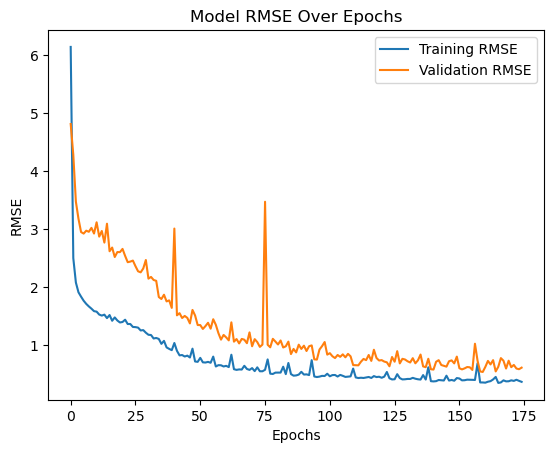

In [374]:
plt.plot(history.history['rmse'], label='Training RMSE')
plt.plot(history.history['val_rmse'], label='Validation RMSE')
plt.title('Model RMSE Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('RMSE')
plt.legend()
plt.show()

In [378]:
# 5. Test seti üzerinde değerlendirme
test_metrics = model.evaluate(df_test_X, df_test_y, verbose=0)
print(f"Test RMSE: {test_metrics[1]:.4f}")

Test RMSE: 0.5401


In [379]:
# 5. Test seti üzerinde değerlendirme
test_metrics = model.evaluate(X_test, y_test, verbose=0)
print(f"Test RMSE: {test_metrics[1]:.4f}")

Test RMSE: 0.4014


In [380]:
test_metrics = model.evaluate(df_X, df_y, verbose=0)
print(f"Test RMSE: {test_metrics[1]:.4f}")

Test RMSE: 0.3621


In [390]:
y_pred = model.predict(df_test_final, verbose=0)

In [391]:
y_pred = y_pred.squeeze() 

In [392]:
submission = pd.DataFrame({
    'id': df_test_final_id,        
    'ürün fiyatı': y_pred
})

submission.to_csv('submission.csv', index=False)